# Univariate Gaussian MLE

## Problem Statement

I have $n=100$ pieces of indepdendent and identicially distrubuted (i.i.d) data related to some measurement that is drawn from a **normal distribution**.

Your task is to write code that computes $\mu_{MLE}$ and $\sigma_{MLE}$, which represent the mean and standard deviation computed via MLE, respectively, of the underlying normal distribution for the dataset "MLE_dataset.npy"

## Variable Definitions

1. x = collection of data points ($x_1,x_2,...,x_n$). Loaded in as a numpy array of shape (100,)
2. $\mu$ = mean of the normal distribution
3. $\sigma$ = standard deviation of the normal distribution

## Useful Numpy functions

1. x.shape : returns a tuple that contains the dimension(s) of the numpy array variable name "x"

## Starting information

1. You are given "MLE_dataset.npy" which contains the aforementioned data in the form of a numpy array.

2. You are also given a "load" function which, given the path to "MLE_dataset.npy", will load the values into a numpy array variable and return said variable.

3. For a single piece of data, $x_i$, if the data is drawn from a normal distribution, the likelihood of that data given a normal distribution with parameterized by $\mu$ and $\sigma^2$ can be represented as:

$$p(x_i | \mu, \sigma^2) = \mathcal{N}(x_i; \mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} * \text{exp} \ [-\frac{1}{2}(\frac{x_i - \mu}{\sigma})^2]$$

4. In our case, we aren't dealing with a single observation, but $n=100$ observations. Because our observations are **independent**, we can represent our likelihood function for all observations as the product of the individual observations:

$$p(x | \mu, \sigma^2) = \Pi_{i=1}^N \mathcal{N}(x_i; \mu, \sigma^2) = (\frac{1}{2\pi\sigma^2})^{n/2} * \text{exp} \ [-\frac{1}{2}\sum_{i=1}^N (\frac{x_i - \mu}{\sigma})^2]$$

## MLE estimates for $\mu$ and $\sigma^2$ 

$$\mu_{MLE} = \frac{1}{n} \sum_{i=1}^n x_i$$

$$ \sigma^2_{MLE} = \frac{1}{n} \sum_{i=1}^n(x_i-\mu_{MLE})^2$$


## Task

Using the starting information, your task is to:
1. Write code that correctly finds $\mu_{MLE}$ and $\sigma_{MLE}$ for the data set "MLE_dataset.npy"

## Restrictions:
Failure to meet any of these conditions will result in point deductions

1. I will only be looking at the code in the function "MLE" below. Please make sure any computations done are within the comment bounds of the function "MLE".
2. Do not add any helper functions
3. Do not change the input and output of "load" or "MLE" in the cell below
4. If you are copying the code over to a .py file, the restrictions above still apply!! Please make sure to copy over the comment bounds as well

In [52]:
import scipy.stats
import numpy as np


def load(path):
    '''
    loads "MLE_dataset.npy" given its path into variable 'dataset'. returns 'dataset'
    '''
    dataset = np.load(path)
    return dataset
    
def MLE(dataset):
    '''
    Input:
        dataset - numpy array of shape (100,) - containing the data drawn from unknown gaussian
        
    Output:
        mu - float - MLE estimate of mu based on data
        sigma - float - MLE estimate of sigma based on data
    '''
    mu = 0
    sigma = 0
    
    ''' YOUR CODE HERE '''
    mu = np.mean(dataset)
    sum = 0
    for x in dataset:
        sum += np.sum(np.square(x-mu))
        
    sigma = np.sqrt(sum/100) #we looking for sigma, not sigma squared
    ''' END YOUR CODE'''
    
    return mu, sigma


'''YOUR TEST CODE BELOW HERE'''

#load dataset. assumes data file is in same directory as code file
dataset = load("./MLE_dataset.npy")
mu_sigma = MLE(dataset)
MLE(dataset)



(102.65639598061983, 9.743253619192298)

# Univariate Gaussian EM

## Problem statement

Let us add a layer of difficulty to the problem of estimating the underlying distribution(s) of our data. Previously. we knew that all of our data came from a single underlying normal distribution.

For this problem, I have gone out and collected a brand new data set consisting of $n=200$ data points. These data points are drawn from **one of two unknown gaussian distributions**.

To keep the notation consistent, I will use the subscript ID $k = \{0,1\}$ to represent which gaussian a parameter/variable is referring to.

For instance, $\mu_k$ represents the mean of the gaussian with ID $k$. $\mu_0$ represents the mean of the first gaussian, and $\mu_1$ represents the mean of the second gaussian

## Variable definitions

1. $k$: id of the gaussian distributions. {0,1} 
2. $n$: number of data points. 200 in this case
3. $\mu_k$: the mean of normal distribution $k$
4. $\sigma_k$: the std of normal distribution $k$
5. $\pi_k$: the prior probability of normal distribution $k$
7. $t$: current step number
8. $z_i = k$: represents the idea that i-th data point was drawn from gaussian $k$
9. $x_i$: i-th data point

## Task Description:

To make things clear, here is a list of things we do and don't know.

**Do know:**
1. Our data points, $X = x_1, x_2, ..., x_n$ for $n = 1$ to $n=200$
2. $\mu_0^{t=0}, \sigma_0^{t=0}, \pi_0^{t=0}$ which represent an initial guess for the  mean, std, and prior  of the first gaussian with ID $k=0$
3. $\mu_1^{t=0}, \sigma_1^{t=0}, \pi_1^{t=0}$ which represent an initial guess for the  mean, std, and prior  of the second gaussian with ID $k=1$
4. $\pi_0^{t=0}$ and $\pi_1^{t=0}$ which represent an initial guess for the prior probabilities of gaussian 0 and gaussian 1, respectively
5. The number of iterations your EM algorithm should run for. Do not worry about early stopping, just let it run the full number of iterations
6. Let us define the variable $\theta_k^t$ to be the set ($\hat{\mu_k^t}, \hat{\sigma_k^t}, \hat{\pi_k^t})$, which is our current estimate at time step t for the three unknown parameters of gaussian k. 

**Don't know:**
1. The true means, $\mu_0$ and $\mu_1$ for both gaussian distributions
2. The true standard deviations, $\sigma_0$ and $\sigma_1$ for both gaussian distributions 
3. Which gaussian distribution, $k=0$ or $k=1$, a point, $x_i$, came from.
4. The true fraction of our points that came from gaussian $k=0$ and the true fraction of our points that came from gaussian $k=1$ (the prior probabilities)

#### Note: The lecture example of EM had known priors and you were not asked to estimate the prior with EM. For this reason, the update rule for the priors, $\pi_k$, has been supplied, and you will only need to implement it correctly to find the correct priors.

Your end goal is to implement an algorithm that implements EM and returns the following:
1. $\hat{\mu_0}, \hat{\sigma_0}, \hat{\pi_0}$ which represent the final EM estimate the mean, standard deviation (std), and prior of the first gaussian with ID $k=0$
2. $\hat{\mu_0}, \hat{\sigma_0}, \hat{\pi_0}$ which represent the final EM estimate of the mean, standard deviation (std), and prior of the first gaussian with ID $k=1$


### Useful functions

1. array.shape - returns the shape as a tuple of a numpy array
2. scipy.stats.norm(mean, std).pdf(value) - returns the value pdf(val) of a gaussian distribution paramaterized by (mean, std)

### Restrictions

Failure to meet any of these conditions will result in point deductions

1. I will only be looking at the code in the function "em" below. Please make sure any computations you want to submit as your final answer are done within "em".
2. Please make a clear separation between code that computes the E step and code that computes the M step. 
    - This is done by putting all E-step related code within the E-step comment bounds, and all M-step related code within the M-step comment bounds
3. Do not change the values of any variables marked with the comment "DO NOT CHANGE"
4. Your final answer must not use any libraries other than the ones already imported (numpy and scipy.stats)
5. Your final answer must not use any functions in scipy.stats besides scipy.stats.norm(mean, std).pdf(value) which is defined above
6. If you are copying the code over to a .py file, the restrictions still apply!! Please make sure to copy over the comment bounds as well
7. do not change the input and output of "load" or "em" in the cell below
8. Please do not have any calls to helper functions in your final answer

### Task Order
1. Determine the update rules for $\mu_k^{t+1}$ and $\sigma_k^{t+1}$ and write them in the cell below
2. Code the E and M step
3. Run and test your code on "EM_dataset.py"


## E - Step
$P(z_i = k | x_i, \theta_k^t)$ reflects the responsibility the k-th gaussian has for the i-th data point
$$P(z_i = k | x_i, \theta_k^t) = \frac{P(x_i | z_i = k, \theta_k^t)*\pi_k^t}{P(x_i | \theta_k^t)}$$ \
$$= \frac{P(x_i | z_i = k, \theta_k^t)*\pi_k^t}{\sum_{k=0}^{1}P(x_i | z_i = k, \theta_k^t)*\pi_k^t}$$



## M - Step


$$\mu_k^{t+1} = \ ??$$

$$\sigma_k^{t+1} = \ ??$$

$$\pi_k^{t+1} = \frac{\sum_{i=1}^n P(z_i = k | x_i, \theta_k^t)}{n}$$


**hint 1: You will need to use the result of your E-step, $P(z_i = k | x_i, \theta_k^t)$, in your update rules for $\mu_k^{t+1}$ and $\sigma_k^{t+1}$**

### (Double click to edit cell)

Please write your update rule for:
$\mu_k^{t+1}$ =  Please see corrsponding note below


Please write your update rule for: $\sigma_k^{t+1}$ = Please see corrsponding note below

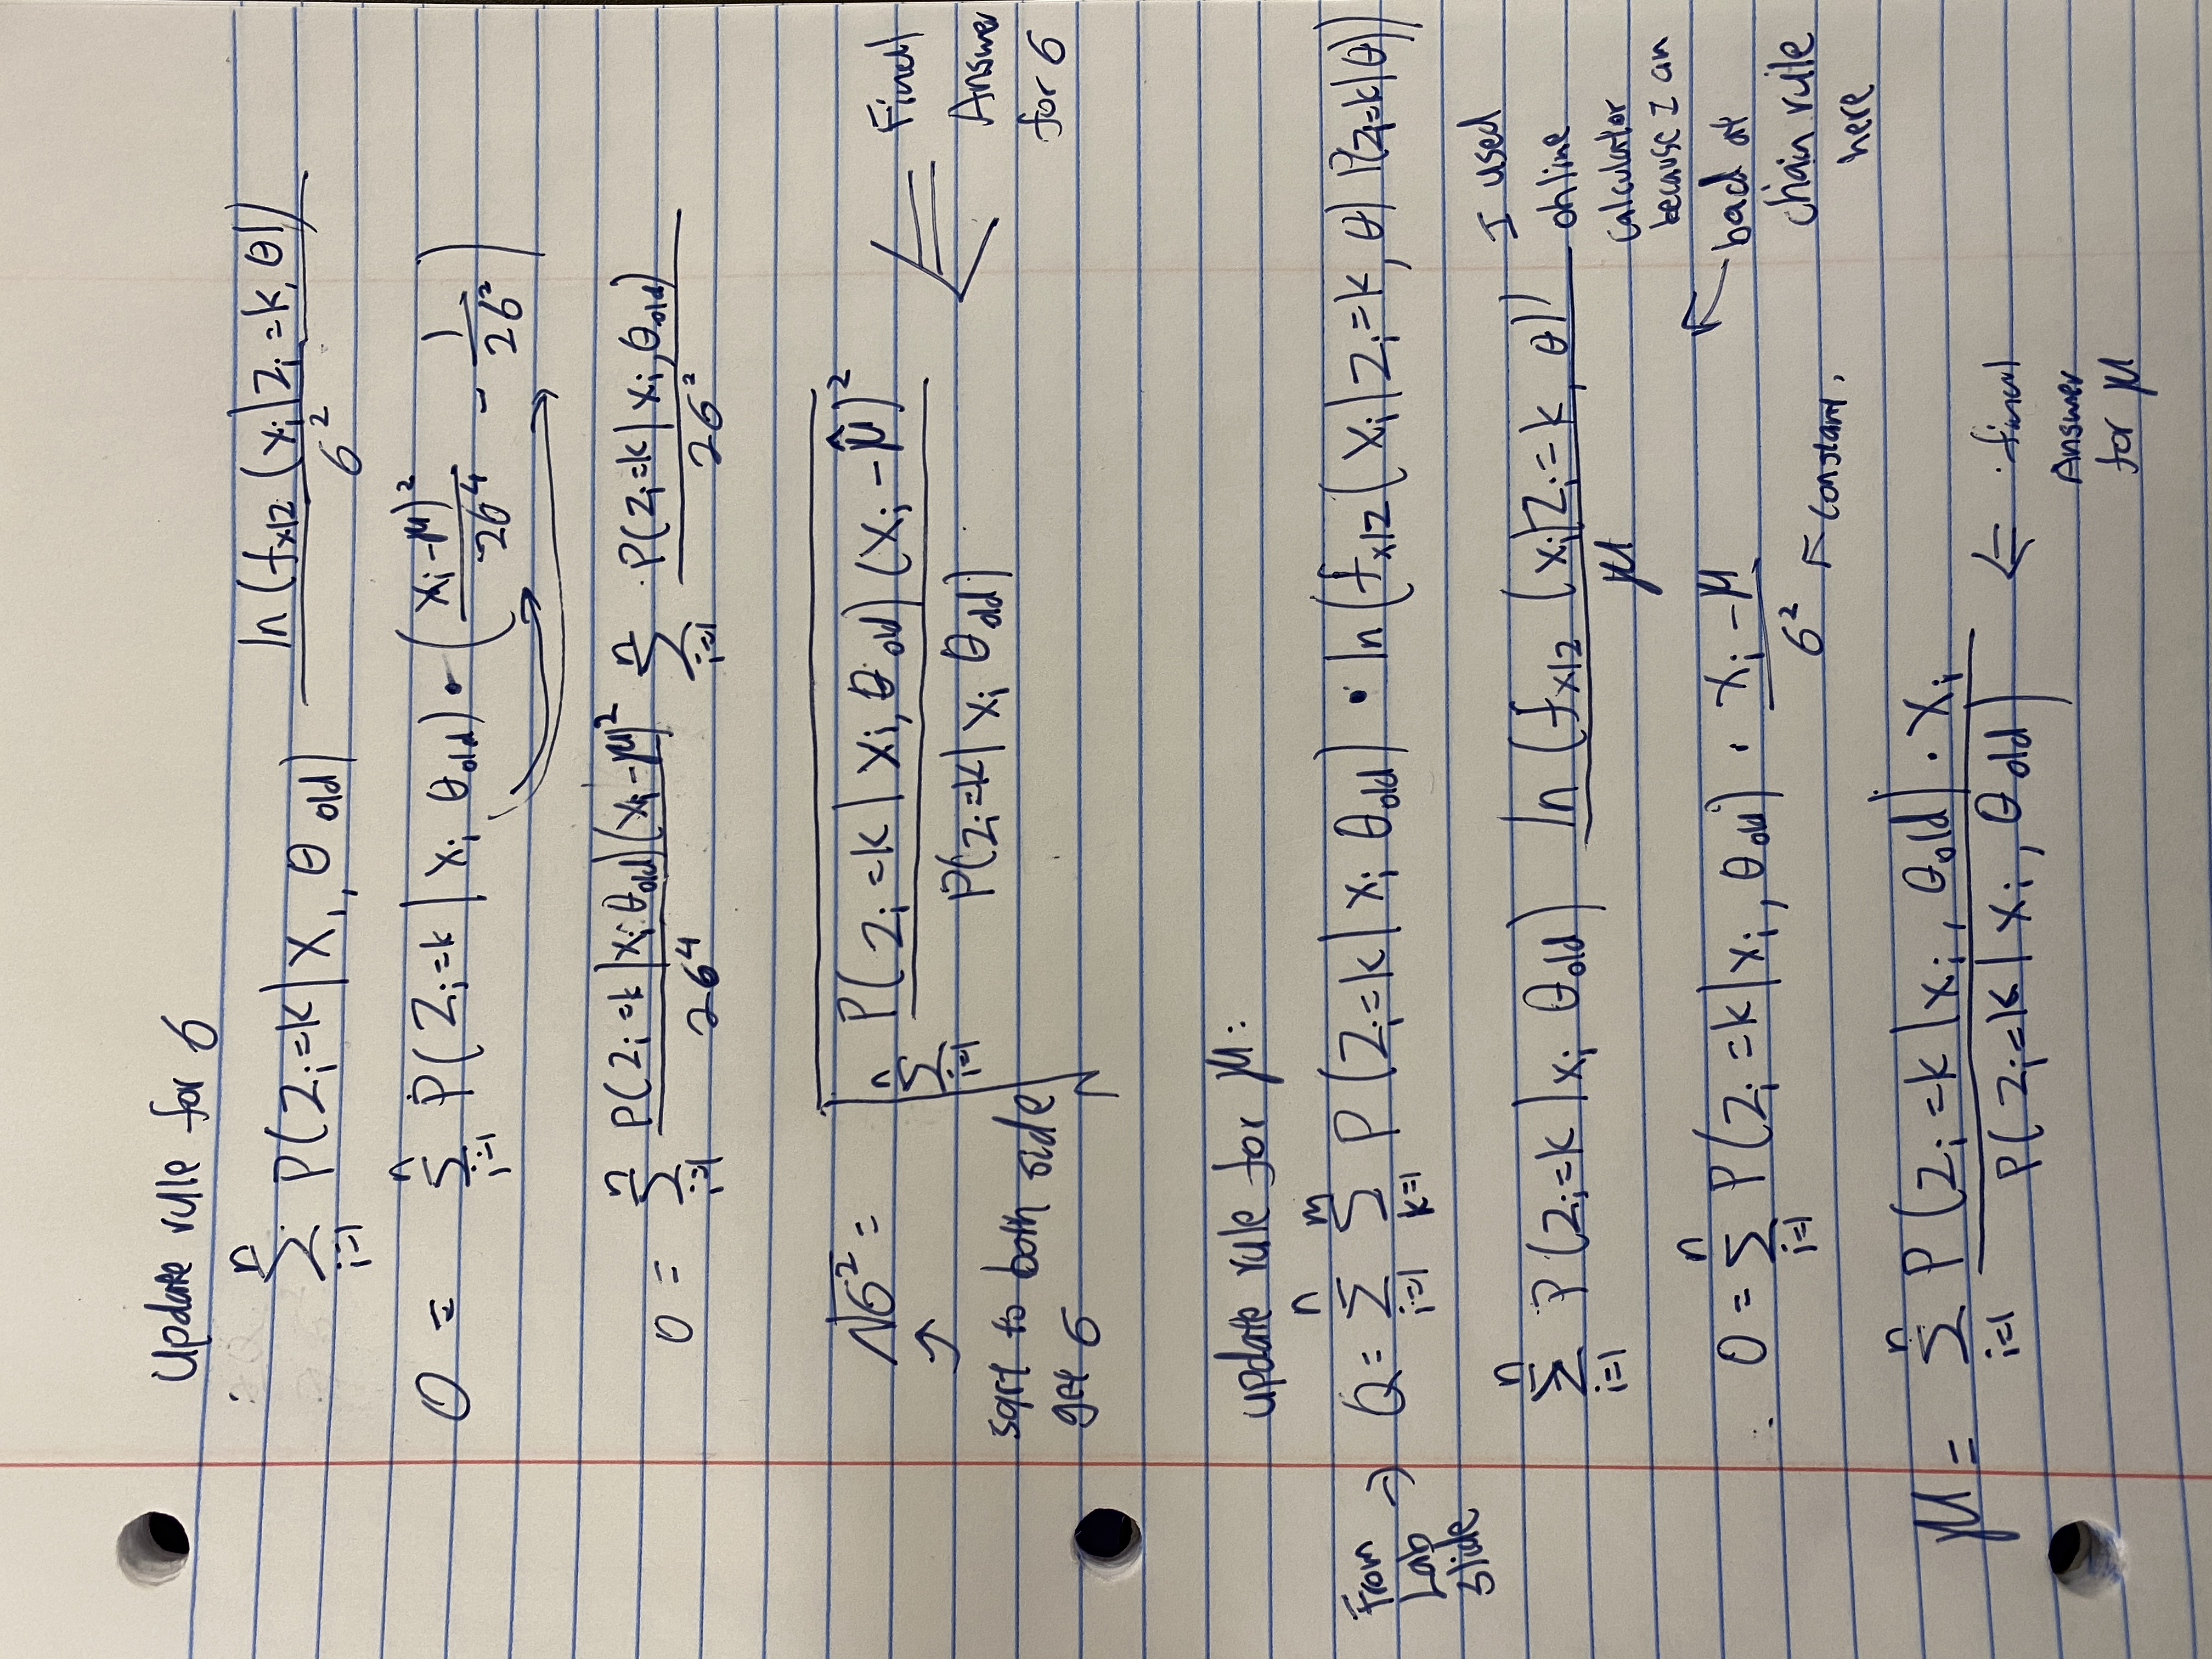

In [46]:
import scipy.stats
import numpy as np

def load(path):
    dataset = np.load(path)
    return dataset

def em(dataset, k, n_iterations):
    '''
    Input:
        dataset - np array - containing the data
        k - int - representing the number of underlying gaussian distributions
        n_iterations - int - representing number of iterations EM should run for
        
    output:
        mus - np array shape (2,) - mus[k] is the EM estimate of the mean of the kth gaussian
        sigmas - np array shape (2,) - sigmas[k] is the EM estimate of the stdev of the kth gaussian
        pi - np array shape (2,) - pis[j] is the EM estimate of the prior of the kth gaussian
    '''
    n_samples = dataset.shape[0]

    # Initial guesses for the parameters DO NOT CHANGE
    FINAL_INITIAL_MUS = np.asarray([90, 210]) #DO NOT CHANGE
    FINAL_INITIAL_SIGMAS = np.asarray([28,19]) #DO NOT CHANGE
    FINAL_INITIAL_PIS = np.asarray([0.3,.7]) #DO NOT CHANGE
    pis = FINAL_INITIAL_PIS #DO NOT CHANGE
    mus = FINAL_INITIAL_MUS #DO NOT CHANGE
    sigmas = FINAL_INITIAL_SIGMAS #DO NOT CHANGE
            
    for em_iter in (range(n_iterations)):
            #E Step
            '''YOUR E STEP CODE GOES HERE'''
            #pass #remove this line when running your code
            list_k_equals_0=[]
            list_k_equals_1=[]
            
            #we calculate the likelihood based on the given equation
            
             # this is the part for P(x_i |z_i =k, theta^t _k )*   (pi^t_k)
          
            for x in dataset:
                #P(x_i |z_i =k, theta^t _k ) = using scipy.stats.norm for calculate the likelihood
                likelihood_k0 = scipy.stats.norm(mus[0],sigmas[0]).pdf(x)
                likelihood_k1 = scipy.stats.norm(mus[1],sigmas[1]).pdf(x)
                when_k_0 = (likelihood_k0 * pis[0]) / (likelihood_k0*pis[0] + likelihood_k1*pis[1])
                when_k_1 = (likelihood_k1 * pis[1]) / (likelihood_k0*pis[0] + likelihood_k1*pis[1])
                list_k_equals_0.append(when_k_0)
                list_k_equals_1.append(when_k_1)
                
            
           
            '''E STEP CODE END'''
            
            #M step
            
            '''YOUR M STEP CODE GOES HERE'''
            
           
            
            
            #we just need variable holders for summing the entire E STEP for when k=1 and k=0
            e_step_sum_k0=0
            e_step_sum_k1=0
            
            #we need to sum up the mus for when k=1 and k=0, we are going to loop over the samples given and multiply
            #every elements in the dataset. (k_1*x1 + k_1*x2 ......) , (k_0*x1 + k_0*x2 ......)
            sum_mu_0=0
            sum_mu_1=0
            for i in range(n_samples):
                sum_mu_0 += np.multiply(list_k_equals_0[i],dataset[i])
                sum_mu_1 += np.multiply(list_k_equals_1[i], dataset[i])
                
            e_step_sum_k0 = np.sum(list_k_equals_0)
            e_step_sum_k1 = np.sum(list_k_equals_1)
            
            pis = np.asarray([(e_step_sum_k0/n_samples),(e_step_sum_k1/n_samples)])
            #we found the pi for k=1 and k=0 here using the equation, and we display both of them
            
            mu_for_k_0 = np.divide(sum_mu_0,e_step_sum_k0)
            mu_for_k_1 = np.divide(sum_mu_1,e_step_sum_k1)
            
            mus = np.asarray([mu_for_k_0,mu_for_k_1])
            #we found the mus for k=1 and k=0
            
            
            #initalize variables for sigma_sum when k=1 and k=0
            
            #M STEP PROCESS: we can use problem 1:
            # for x in dataset:
            #sum += np.sum(np.square(x-mu))
        
           # sigma = np.sqrt(sum/100) #we looking for sigma, not sigma squared
            sigma_sum_0 =0
            sigma_sum_1 =0
           
            for i in range(n_samples):
                sigma_sum_0 += np.multiply(list_k_equals_0[i], np.square(dataset[i]-mu_for_k_0))
                sigma_sum_1 += np.multiply(list_k_equals_1[i], np.square(dataset[i]-mu_for_k_1))
                
           
            sigmas = np.asarray([np.sqrt(sigma_sum_0/ e_step_sum_k0),np.sqrt(sigma_sum_1/e_step_sum_k1)])
           #final answers for sigmas k=1 and k=0
        
        #now we have all the answers to the return. We finished here with n_samples.
            
                        
            '''M STEP CODE END'''

    return pis, mus, sigmas

def main():
    
    n_iterations = 20 #DO NOT CHANGE
    k = 2 #DO NOT CHANGE
    
    '''YOUR TEST CODE HERE'''
    #load dataset. assumes data file is in same directory as code file
    dataset = np.load("EM_dataset.npy")
    pis, mus, sigmas = em(dataset, k, n_iterations)
    print(em(dataset, k, n_iterations))

    
main()

(array([0.41534395, 0.58465605]), array([100.50444169, 201.90594025]), array([23.10763968, 19.8353594 ]))
